### Zomato Indian Restaurants EDA Project

In [2]:
# 1. Introduction
# Exploratory Data Analysis of Indian restaurants to identify factors influencing restaurant ratings.

In [3]:
!pip install wordcloud

In [4]:
# 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid')

In [5]:
# 3. Load Dataset
df = pd.read_csv("C:/Users/Admin/Desktop/Zomato/Indian-Resturants.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [6]:
# 4. Basic Data Info
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944,211944,211944,211810,211944,211944.000000,211944,211944.000000,211944.000000,...,211944.000000,211944,211944,211944.000000,211944,211944.000000,211944.000000,211896.0,211944.000000,211944.0
unique,NaN,41100,27,55568,50657,99,NaN,3731,NaN,NaN,...,NaN,1,31455,NaN,39,NaN,NaN,NaN,NaN,NaN
top,NaN,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,NaN,Civil Lines,NaN,NaN,...,NaN,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",NaN,Very Good,NaN,NaN,NaN,NaN,NaN
freq,NaN,3108,64390,169,299,11630,NaN,3660,NaN,NaN,...,NaN,211944,3352,NaN,65451,NaN,NaN,NaN,NaN,NaN
mean,1.349411e+07,NaN,NaN,NaN,NaN,NaN,4746.785434,NaN,21.499758,77.615276,...,1.882535,NaN,NaN,3.395937,NaN,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,NaN,NaN,NaN,NaN,NaN,5568.766386,NaN,22.781331,7.500104,...,0.892989,NaN,NaN,1.283642,NaN,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,15.496071,74.877961,...,1.000000,NaN,NaN,3.300000,NaN,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,22.514494,77.425971,...,2.000000,NaN,NaN,3.800000,NaN,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,NaN,NaN,NaN,NaN,NaN,11306.000000,NaN,26.841667,80.219323,...,2.000000,NaN,NaN,4.100000,NaN,362.000000,128.000000,0.0,1.000000,-1.0


In [7]:
# 5. Remove Duplicates
df.drop_duplicates(inplace=True)
print(f"After removing duplicates: {df.shape[0]} rows")

After removing duplicates: 60417 rows


In [8]:
# 6. Missing Values
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [9]:
# 7. Feature Overview
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

name: 41100 unique values
establishment: 27 unique values
url: 55568 unique values
address: 50657 unique values
city: 99 unique values
locality: 3731 unique values
zipcode: 1311 unique values
locality_verbose: 3910 unique values
cuisines: 9382 unique values
timings: 7740 unique values
currency: 1 unique values
highlights: 31455 unique values
rating_text: 39 unique values


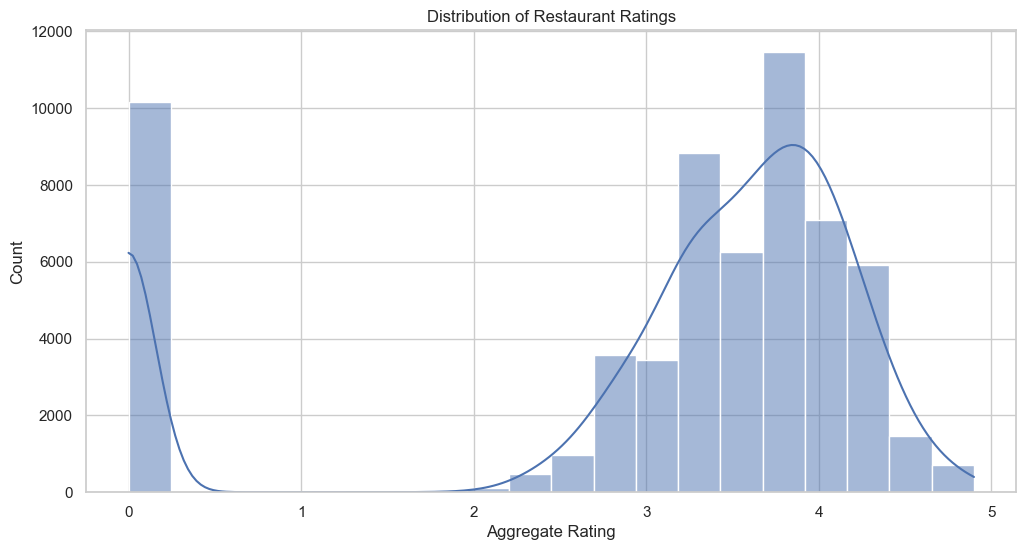

In [11]:
# 8. Average Rating Distribution
sns.histplot(df['aggregate_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

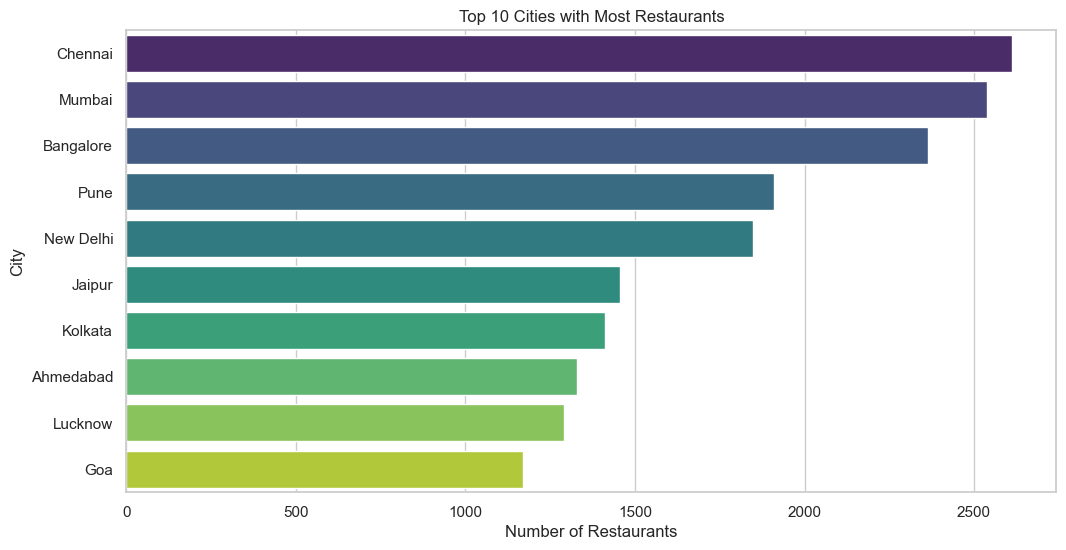

In [13]:
# 9. City with Highest Restaurant Count
city_counts = df['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

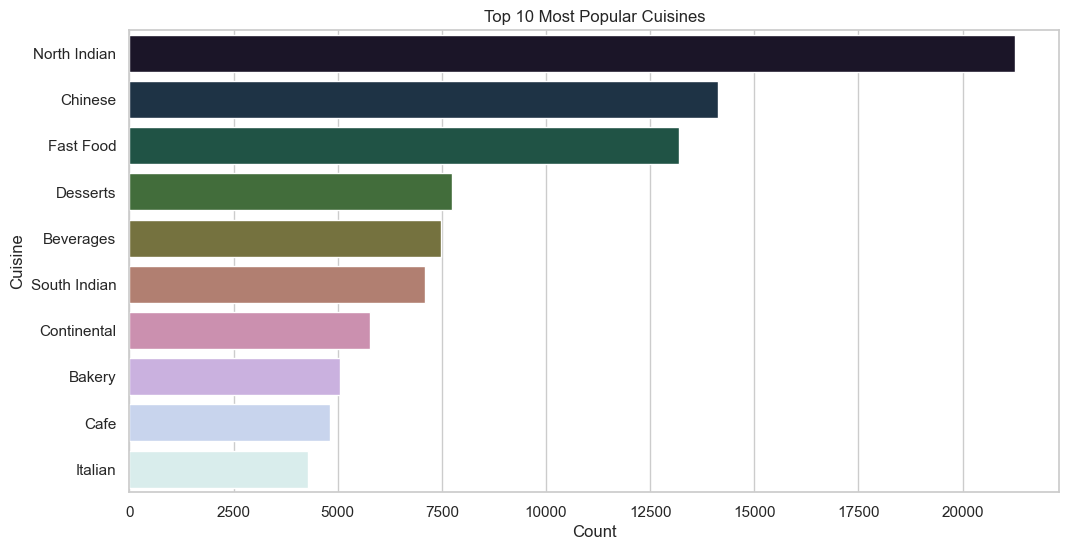

In [14]:
# 10. Cuisine Popularity
cuisine_series = df['cuisines'].dropna().str.split(', ').explode()
top_cuisines = cuisine_series.value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='cubehelix')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

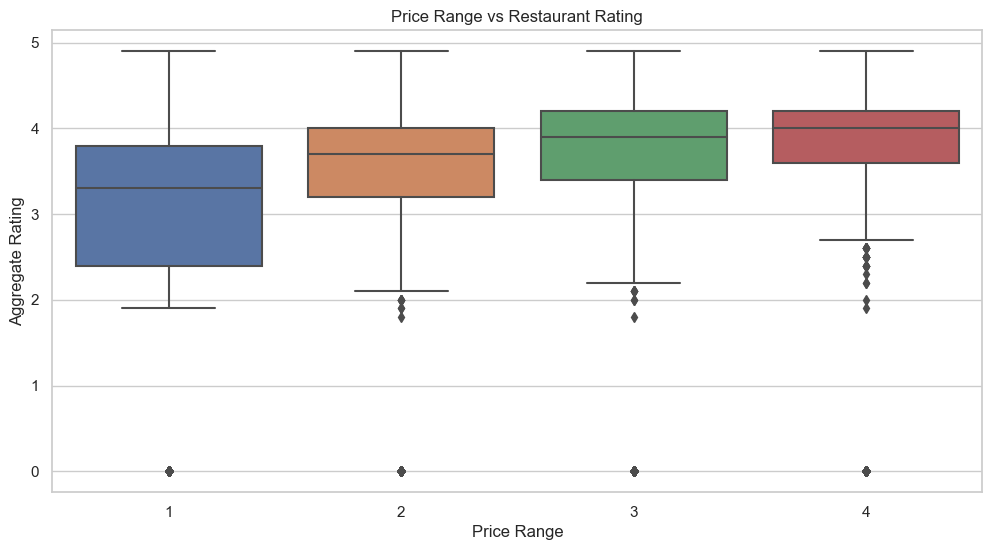

In [16]:
# 11. Price Range vs Rating
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Price Range vs Restaurant Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

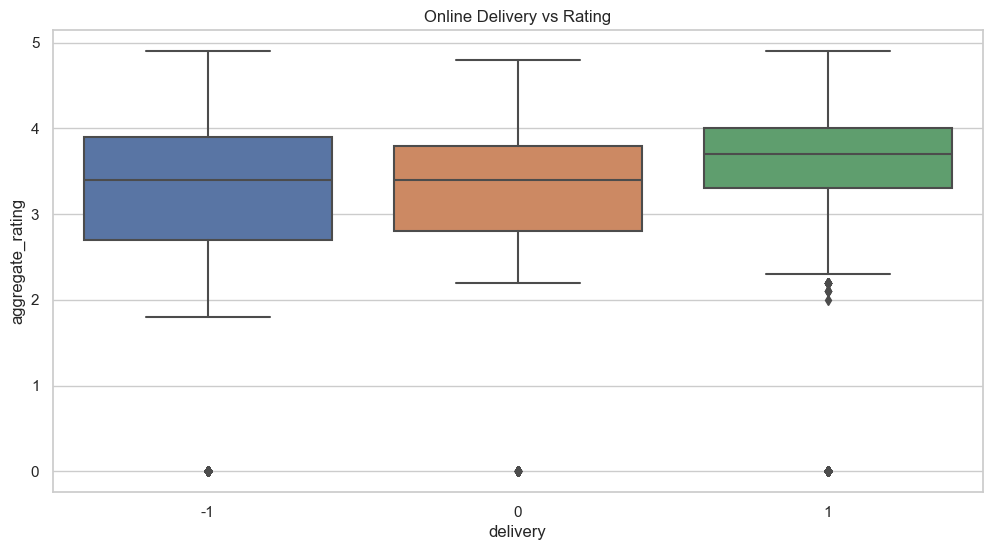

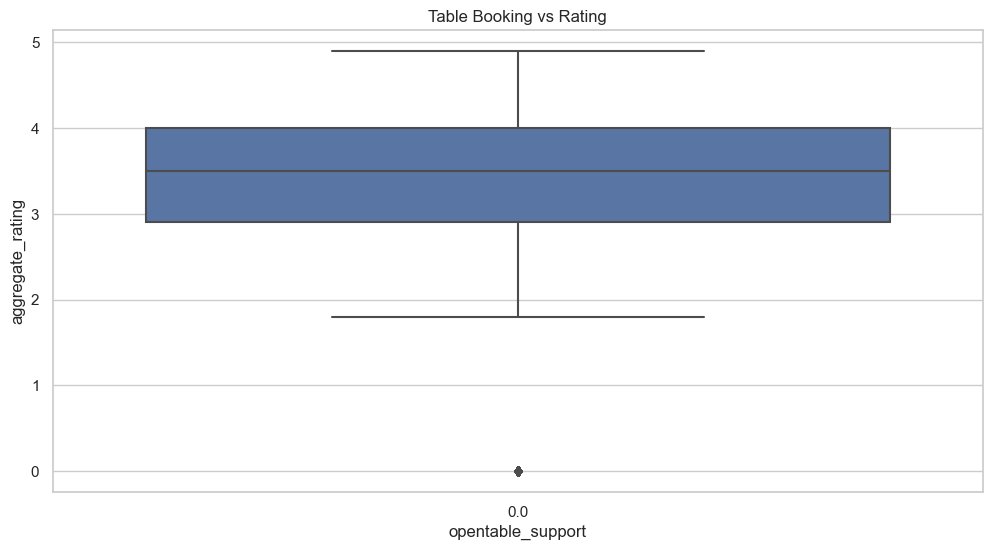

In [17]:
# 12. Online Order & Table Booking vs Ratings
sns.boxplot(x='delivery', y='aggregate_rating', data=df)
plt.title('Online Delivery vs Rating')
plt.show()

sns.boxplot(x='opentable_support', y='aggregate_rating', data=df)
plt.title('Table Booking vs Rating')
plt.show()

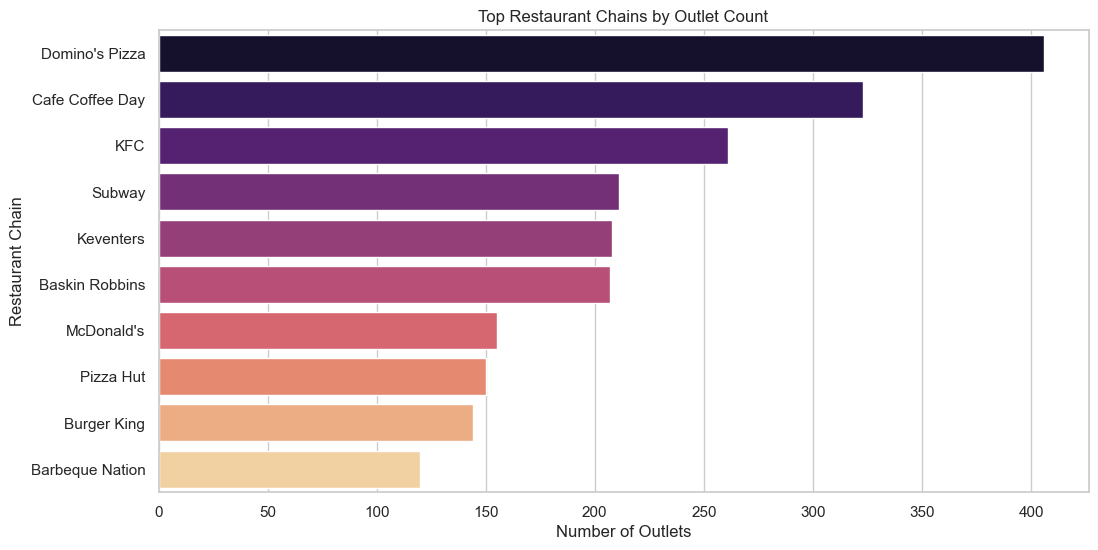

In [18]:
# 13. Top Restaurant Chains
chains = df['name'].value_counts().head(10)
sns.barplot(x=chains.values, y=chains.index, palette='magma')
plt.title('Top Restaurant Chains by Outlet Count')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Chain')
plt.show()

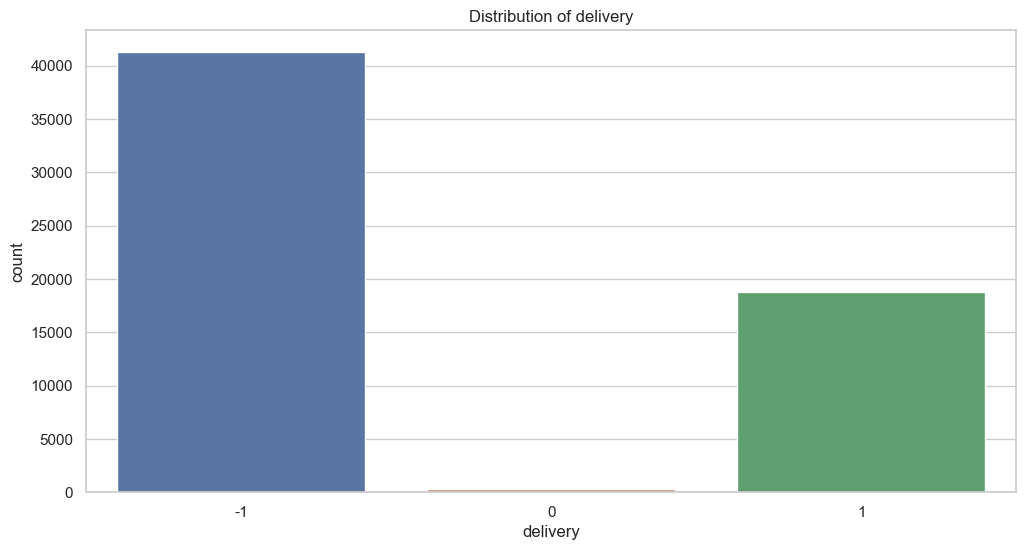

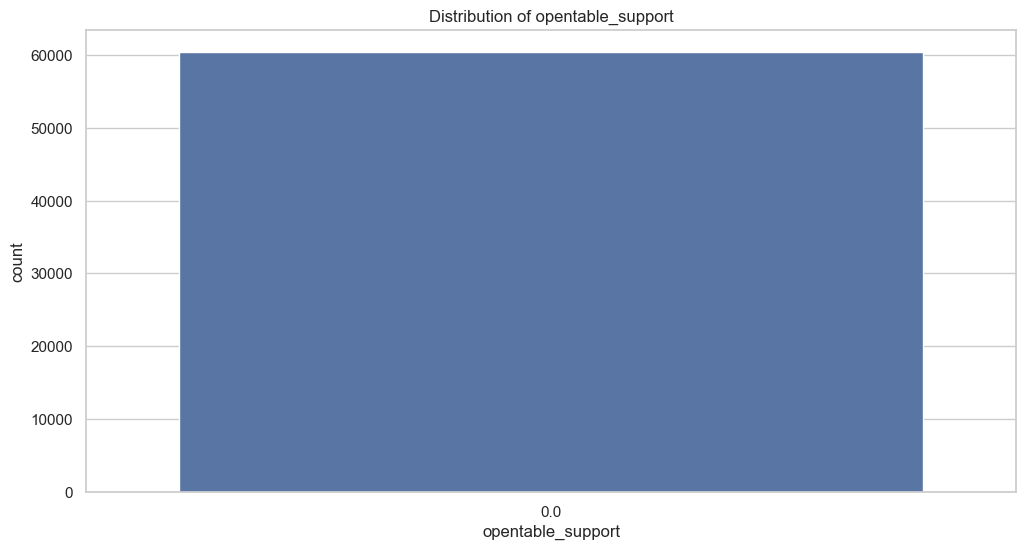

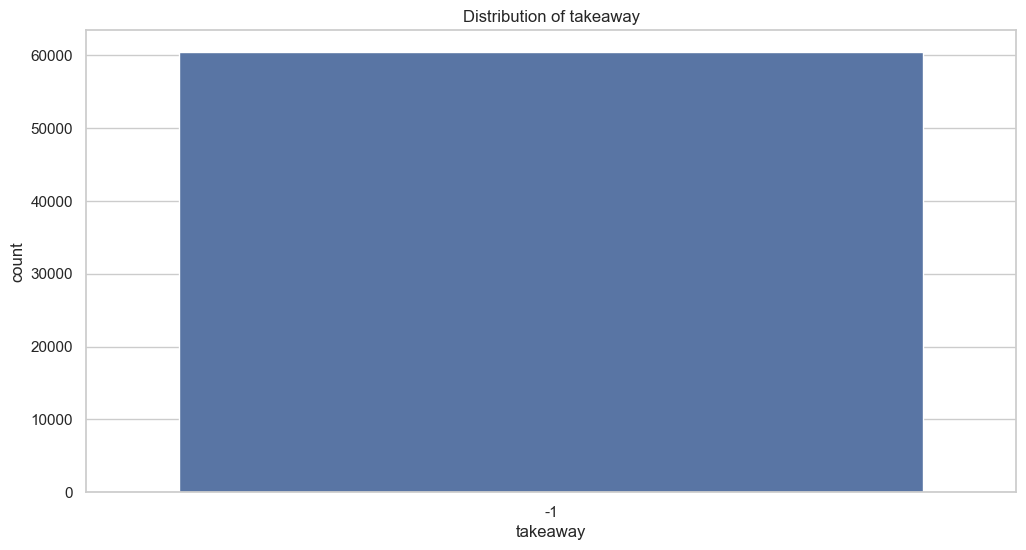

In [20]:
# 14. Feature Availability
features = ['delivery', 'opentable_support', 'takeaway']
for feature in features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

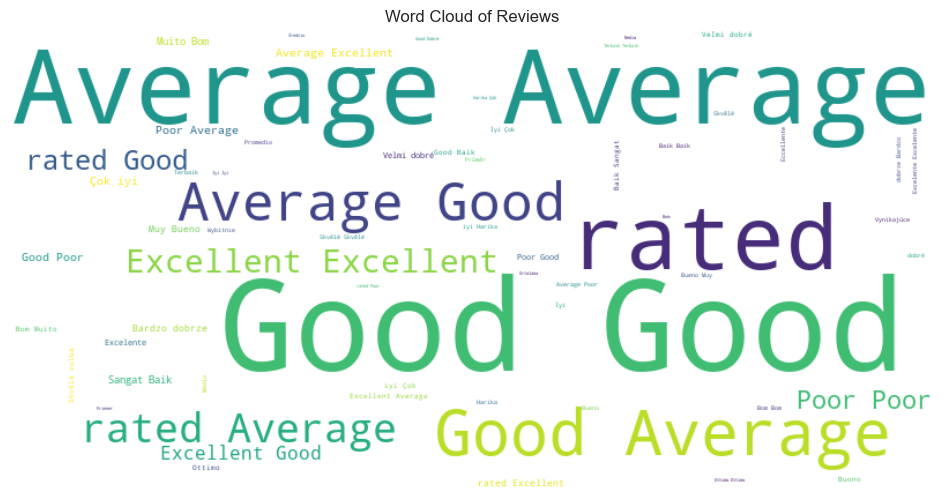

In [22]:
# 15. Word Cloud of Reviews (if available)
if 'rating_text' in df.columns:
    text = ' '.join(df['rating_text'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

In [23]:
# 16. Conclusion
print("\n--- Conclusion ---")
print("1. Identified top cities and cuisines with high restaurant density.")
print("2. Found correlation between price range, booking options, and ratings.")
print("3. Popular chains and features were explored.")
print("4. Word cloud highlighted common sentiments from customer reviews.")


--- Conclusion ---
1. Identified top cities and cuisines with high restaurant density.
2. Found correlation between price range, booking options, and ratings.
3. Popular chains and features were explored.
4. Word cloud highlighted common sentiments from customer reviews.
